# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Despite the growing economy, participation rates for College Entrance Exams such as the SAT and ACT are still at a low for many states. With jobs and roles evolving in the work force, the new generation are expected to be equipped with the relevant skills obtained mainly from tertiary education. 

Hence, attending the entrance exams is the first step for students and we aim to provide recommendations on how to improve rates, particularly for states with lower percentages of participation for both exams.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:

import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat_2017 = pd.read_csv('../data/sat_2017.csv')

In [3]:
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
#Code:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [5]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: The sat_2017 database displays information for each state in the USA, displaying the percentage rate of participation for the SATs and potentially the state average scores of each module as well as the total average of students who have participated.

The same applies for the act_2017 database except it displays the state average composite of the modules rather than a total summed score.

#### 4a. Does the data look complete? 

Answer: the data appears to be complete, however there are inconsistencies as act_2017 contains national average while sat_2017 does not.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [6]:
# In our observation, sat_2017's minimum value is a score of 52 which is very likely an input error
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [7]:
# There is also an issue with the Science minimum score for ACT, to investigate which State is returning this value

act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [8]:
# State of Maryland has an input error for SAT Math score and ACT Science score
sat_2017.sort_values('Math').head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060
8,District of Columbia,100%,482,468,950
7,Delaware,100%,503,492,996
12,Idaho,93%,513,493,1005
22,Michigan,100%,509,495,1005


In [9]:
act_2017.sort_values('Science').head()

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6
29,Nevada,100%,16.3,18.0,18.1,18.2,17.8
25,Mississippi,100%,18.2,18.1,18.8,18.8,18.6
41,South Carolina,100%,17.5,18.6,19.1,18.9,18.7
34,North Carolina,100%,17.8,19.3,19.6,19.3,19.1


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [10]:
# Fixing sat_2017 Maryland State's Math score
sat_2017['Math'] = sat_2017['Math'].replace(52, 524)

In [11]:
# sat_2017 values have been amended
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,556.882353,1126.098039
std,45.666901,47.121395,92.494812
min,482.000000,468.000000,950.000000
25%,533.500000,523.500000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [12]:
# Fixing sat_2017 Maryland State's Math score
act_2017['Science'] = act_2017['Science'].replace(2.3, 23.2)

In [13]:
# act_2017 values have been amended
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.442308
std,2.332132,1.963602,2.048672,1.723351
min,16.300000,18.000000,18.100000,18.200000
25%,19.000000,19.400000,20.475000,19.975000
50%,20.550000,20.900000,21.700000,21.300000
75%,23.300000,23.100000,24.125000,23.200000
max,25.500000,25.300000,26.000000,24.900000


In [14]:
# We define a function to insert new rows 
# in the top of the dataframe 
def Insert_row(row_number, df, row_value): 
    # Starting value of upper half 
    start_upper = 0 
    end_upper = row_number 
    start_lower = row_number 
    end_lower = df.shape[0] 
    upper_half = [*range(start_upper, end_upper, 1)] 
    lower_half = [*range(start_lower, end_lower, 1)] 
    lower_half = [x.__add__(1) for x in lower_half] 
    index_ = upper_half + lower_half 
    df.index = index_ 
    df.loc[row_number] = row_value 
    df = df.sort_index() 
    return df

In [15]:
#code
# The code displays the potential number of omitted cells in the database for each column
# If RangeIndex entries is equal to each column's non-null object,
# there are no omitted cells and the information provided is complete
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [16]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


#### 5. What are your data types? 
Display the data types of each feature. 

In [17]:
#code
type(sat_2017)

pandas.core.frame.DataFrame

In [18]:
type(act_2017)

pandas.core.frame.DataFrame

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: Based on our observation in our sat_2017.info() readings, Participation column values are represented as object types. This is incorrect as percentage values should be represented as floats based on their type (e.g. 60% is numerically a float of 0.6).

For act_2017, the Participation and Composite columns are represented as objects and should be converted to floats.

Converting objects to floats will prevent type errors in future computation.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [19]:
#code
def percentage_change(series):
    """Input dataframe column to convert strings into floats, specifically strings with percentage values"""
    return float(series.strip('%'))/100

sat_2017['Participation'] = sat_2017['Participation'].apply(percentage_change)
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [20]:
act_2017['Participation'] = act_2017['Participation'].apply(percentage_change)
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(5), object(2)
memory usage: 3.0+ KB


- Fix any individual values preventing other columns from being the appropriate type.

In [21]:
# In the code below, 
# we discover that there is an object preventing the "Composite" column of the act_2017 database to be a float.
def composite_change(series):
    return float(series)

# Create a for loop to scan through the Composite column for the value causing type to be object
# Printing out the value causing the issue, we discover that one item has a typo 'x' in it's value
for scan in act_2017['Composite']:
    try:
        float(scan)
    except:
        print(scan)       

20.2x


- Finish your data modifications by making sure the columns are now typed appropriately.

In [22]:
#code
def composite_change(series):
    """input the DataFrame's column to convert all objects into floats, removing any with the string 'x'"""
    return float(series.strip('x'))

act_2017['Composite'] = act_2017['Composite'].apply(composite_change)
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


- Display the data types again to confirm they are correct.

In [23]:
#Code:
act_2017.tail()

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,0.29,23.5,23.3,24.6,23.5,23.8
48,Washington,0.29,20.9,21.9,22.1,22.0,21.9
49,West Virginia,0.69,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,1.00,19.7,20.4,20.6,20.9,20.5
51,Wyoming,1.00,19.4,19.8,20.8,20.6,20.2


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [24]:
#code
sat_2017.columns = ['state', 'sat_2017_participation', 'sat_2017_erw', 'sat_2017_mth', 'sat_2017_total']
act_2017.columns = ['state', 'act_2017_participation', 'act_2017_eng', 'act_2017_mth', 'act_2017_rdg', 'act_2017_sci', 'act_2017_composite']

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

In [25]:
# Housing the details

data_dictionary = {'Feature': ['state', 'sat_2017_participation', 'sat_2017_erw', 'sat_2017_mth','sat_2017_total', 'act_2017_participation', 'act_2017_eng',
       'act_2017_mth', 'act_2017_rdg', 'act_2017_sci', 'act_2017_composite',
       'sat_2018_participation', 'sat_2018_erw', 'sat_2018_mth',
       'sat_2018_total', 'act_2018_participation', 'act_2018_composite',
       'act_2018_eng', 'act_2018_mth', 'act_2018_rdg', 'act_2018_sci'], 
                   'Type': ['object', 'float', 'integer', 'integer', 'integer', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'integer', 'integer', 'integer', 'float', 'float', 'float', 'float', 'float', 'float'],
                  'Dataset': ['final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final'],
                  'Description': ['The names of the 50 states of the USA', 'The SAT 2017 participation rate of each state by % (e.g. 0.4 = 40%)', 'The score for SAT 2017 Evidence-Based Reading & Writing', 'The score for SAT 2017 Math', 'The total score for SAT 2017', 'The ACT 2017 participation rate of each state by % (e.g. 0.4 = 40%)', 'The score for ACT 2017 English', 'The score for ACT 2017 Math', 'The score for ACT 2017 Reading', 'The score for ACT 2017 Science', 'The composite score for ACT 2017', 'The SAT 2018 participation rate of each state by % (e.g. 0.4 = 40%)', 'The score for SAT 2018 Evidence-Based Reading & Writing', 'The score for SAT 2018 Math', 'The total score for SAT 2018', 'The ACT 2018 participation rate of each state by % (e.g. 0.4 = 40%)', 'The score for ACT 2018 English', 'The score for ACT 2018 Math', 'The score for ACT 2018 Reading', 'The score for ACT 2018 Science', 'The composite score for ACT 2018']}

In [26]:
# Converting dictionary into a dataframe, 'Feature' set as index

dictionary = pd.DataFrame(data_dictionary)
dictionary.set_index('Feature', inplace=True)
pd.set_option('max_colwidth', 100)

dictionary

,Type,Dataset,Description
Feature,,,
state,object,final,The names of the 50 states of the USA
sat_2017_participation,float,final,The SAT 2017 participation rate of each state by % (e.g. 0.4 = 40%)
sat_2017_erw,integer,final,The score for SAT 2017 Evidence-Based Reading & Writing
sat_2017_mth,integer,final,The score for SAT 2017 Math
sat_2017_total,integer,final,The total score for SAT 2017
act_2017_participation,float,final,The ACT 2017 participation rate of each state by % (e.g. 0.4 = 40%)
act_2017_eng,float,final,The score for ACT 2017 English
act_2017_mth,float,final,The score for ACT 2017 Math
act_2017_rdg,float,final,The score for ACT 2017 Reading


|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [27]:
#code
# Removing the National Average row to be consistent with sat_2017
act_2017 = act_2017.drop(axis=0, index=0)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [28]:
#Code:
results_2017 = pd.merge(sat_2017, act_2017, on='state', how='outer')
results_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 11 columns):
state                     51 non-null object
sat_2017_participation    51 non-null float64
sat_2017_erw              51 non-null int64
sat_2017_mth              51 non-null int64
sat_2017_total            51 non-null int64
act_2017_participation    51 non-null float64
act_2017_eng              51 non-null float64
act_2017_mth              51 non-null float64
act_2017_rdg              51 non-null float64
act_2017_sci              51 non-null float64
act_2017_composite        51 non-null float64
dtypes: float64(7), int64(3), object(1)
memory usage: 4.8+ KB


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [29]:
#code
results_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [30]:
# Importing both 2018 csv files
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018_updated.csv')

In [31]:
# Getting an idea on what we may need to amend
sat_2018.info()
# From our observations, Participation should be converted from str to float
# The columns would need to be renamed as well

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [32]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [33]:
# Our observations here detects that the module columns are missing
# Participation should be converted from str to float
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State                            51 non-null object
Percentage of Students Tested    51 non-null int64
Average Composite Score          51 non-null float64
Average English Score            51 non-null float64
Average Math Score               51 non-null float64
Average Reading Score            51 non-null float64
Average Science Score            51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [34]:
# Based on our observations, Percentage of Students Tested is an integer rather than a float
act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [35]:
# To summarise our amendments for 2018:
# - sat_2018
# 1. Change column names
# 2. Change Participation type from str to float

# - act_2018
# 1. Change column names
# 2. Change Participation type from int to float

#For some of the amendments, we will be re-using functions used for 2017 such as the str to float conversion

In [36]:
# Converting sat_2018's participation from str to float
sat_2018['Participation'] = sat_2018['Participation'].apply(percentage_change)
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [37]:
# Using a lambda function to convert tested integer into float
act_2018['Percentage of Students Tested'] = act_2018['Percentage of Students Tested'].apply(lambda thiscell: float(thiscell)/100)
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State                            51 non-null object
Percentage of Students Tested    51 non-null float64
Average Composite Score          51 non-null float64
Average English Score            51 non-null float64
Average Math Score               51 non-null float64
Average Reading Score            51 non-null float64
Average Science Score            51 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


In [38]:
# Renaming both 2018 datasets' columns
# act_2018 column is ordered differently from act_2017
sat_2018.columns = ['state', 'sat_2018_participation', 'sat_2018_erw', 'sat_2018_mth', 'sat_2018_total']
act_2018.columns = ['state', 'act_2018_participation', 'act_2018_composite', 'act_2018_eng', 'act_2018_mth', 'act_2018_rdg', 'act_2018_sci']

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [39]:
# Merging sat_2018 and act_2018 dataframes together
results_2018 = pd.merge(sat_2018, act_2018, on='state', how='outer')
results_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 11 columns):
state                     51 non-null object
sat_2018_participation    51 non-null float64
sat_2018_erw              51 non-null int64
sat_2018_mth              51 non-null int64
sat_2018_total            51 non-null int64
act_2018_participation    51 non-null float64
act_2018_composite        51 non-null float64
act_2018_eng              51 non-null float64
act_2018_mth              51 non-null float64
act_2018_rdg              51 non-null float64
act_2018_sci              51 non-null float64
dtypes: float64(7), int64(3), object(1)
memory usage: 4.8+ KB


In [40]:
# Merging 2017 and 2018 into one final.csv
final = pd.merge(results_2017, results_2018, on='state', how='outer')
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 21 columns):
state                     51 non-null object
sat_2017_participation    51 non-null float64
sat_2017_erw              51 non-null int64
sat_2017_mth              51 non-null int64
sat_2017_total            51 non-null int64
act_2017_participation    51 non-null float64
act_2017_eng              51 non-null float64
act_2017_mth              51 non-null float64
act_2017_rdg              51 non-null float64
act_2017_sci              51 non-null float64
act_2017_composite        51 non-null float64
sat_2018_participation    51 non-null float64
sat_2018_erw              51 non-null int64
sat_2018_mth              51 non-null int64
sat_2018_total            51 non-null int64
act_2018_participation    51 non-null float64
act_2018_composite        51 non-null float64
act_2018_eng              51 non-null float64
act_2018_mth              51 non-null float64
act_2018_rdg              51 non-nul

In [41]:
# Save final.csv into relative path
results_2017.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [42]:
#Code:
final.describe()

,sat_2017_participation,sat_2017_erw,sat_2017_mth,sat_2017_total,act_2017_participation,act_2017_eng,act_2017_mth,act_2017_rdg,act_2017_sci,act_2017_composite,sat_2018_participation,sat_2018_erw,sat_2018_mth,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_eng,act_2018_mth,act_2018_rdg,act_2018_sci
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.098039,0.652549,20.931373,21.182353,22.013725,21.450980,21.519608,0.457451,563.686275,556.235294,1120.019608,0.616471,21.486275,20.988235,21.125490,22.015686,21.345098
std,0.352766,45.666901,47.121395,92.494812,0.321408,2.353677,1.981989,2.067271,1.739353,2.020695,0.373143,47.502627,47.772623,94.155083,0.340810,2.106278,2.446356,2.035765,2.167245,1.870114
min,0.020000,482.000000,468.000000,950.000000,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,0.020000,480.000000,480.000000,977.000000,0.070000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,0.040000,533.500000,523.500000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,0.045000,534.500000,522.500000,1057.500000,0.285000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.520000,552.000000,544.000000,1098.000000,0.660000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,0.775000,610.500000,593.500000,1204.000000,1.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,643.000000,655.000000,1298.000000,1.000000,25.600000,26.000000,25.200000,26.100000,24.900000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [43]:
# Define a manual calculation to manually compute Standard Deviation

def mean(data):
    """input dataframe column to compute mean for each row item"""
    return float(sum(data) / len(data))

def variance(data):
    """input dataframe column to iterate through each instance (e.g. x = row item, mu = overall mean, and return the mean of the powered result)"""
    mu = mean(data)
    return mean([(x - mu) ** 2 for x in data])

def stddev(data):
    """input dataframe column to square root the variance to obtain the standard deviation"""
    return (variance(data))**0.5

In [44]:
#Code:
# By iterating through the dataframe's columns, we apply the standard deviation function onto the columns where data type is either float or int
sd = {col.name:stddev(col) for col in [final[row] for row in final.columns if (final[row].dtype=='float64' or final[row].dtype=='int64')]}
sd

{'sat_2017_participation': 0.3492907076664507,
 'sat_2017_erw': 45.21697020437866,
 'sat_2017_mth': 46.65713364485503,
 'sat_2017_total': 91.58351056778743,
 'act_2017_participation': 0.3182417575123181,
 'act_2017_eng': 2.3304876369363363,
 'act_2017_mth': 1.9624620273436781,
 'act_2017_rdg': 2.0469029314842646,
 'act_2017_sci': 1.7222161451443676,
 'act_2017_composite': 2.000786081581989,
 'sat_2018_participation': 0.3694661922353942,
 'sat_2018_erw': 47.03460978357609,
 'sat_2018_mth': 47.30194550378352,
 'sat_2018_total': 93.22742384464433,
 'act_2018_participation': 0.33745194881997503,
 'act_2018_composite': 2.0855261815801147,
 'act_2018_eng': 2.4222536143202795,
 'act_2018_mth': 2.015707255555717,
 'act_2018_rdg': 2.145891884510421,
 'act_2018_sci': 1.8516885484833543}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [45]:
# Comparing sd with numpy std function
np.std(final)

sat_2017_participation     0.349291
sat_2017_erw              45.216970
sat_2017_mth              46.657134
sat_2017_total            91.583511
act_2017_participation     0.318242
act_2017_eng               2.330488
act_2017_mth               1.962462
act_2017_rdg               2.046903
act_2017_sci               1.722216
act_2017_composite         2.000786
sat_2018_participation     0.369466
sat_2018_erw              47.034610
sat_2018_mth              47.301946
sat_2018_total            93.227424
act_2018_participation     0.337452
act_2018_composite         2.085526
act_2018_eng               2.422254
act_2018_mth               2.015707
act_2018_rdg               2.145892
act_2018_sci               1.851689
dtype: float64

In [46]:
# Comparing np.std(ddof=1) with pandas .describe()
np.std(final['sat_2017_participation'], ddof=1) - final['sat_2017_participation'].describe().loc['std']

0.0

In [47]:
final['sat_2017_participation'].describe().loc['std']

0.35276632270013036

Answer Based on our observations, our manual standard deviation function is in line with numpy's std function. by determining ddof=1, we are able to tie the values with our dataframe's .describe function

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

# Summary of Analysis
### We will be performing 4 investigations on both exams on both years, the investigations are ordered as:
#### - Highest and Lowest Participation Rates
#### - Highest and Lowest Mean / Composite Scores
#### - 100% Participation for 2017 or 2018
#### - Above 50% Participation for both tests

## Highest and Lowest (Top 5)
#### Here, we analyse each exam for each year by the lowest and highest 5

### Participation Rates
#### We observe the bottom 5 and top 5 states' participation rates

#### SAT 2017

In [48]:
# 2017 SAT Lowest
sat2017least = final.sort_values(['sat_2017_participation']).head()

# 2017 SAT Highest
sat2017most = final.sort_values(['sat_2017_participation'],ascending=False).head()

sat2017 = sat2017least.append(sat2017most)
sat2017[['state','sat_2017_participation']]

,state,sat_2017_participation
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02
25,Missouri,0.03
44,Utah,0.03
8,District of Columbia,1.00
22,Michigan,1.00
6,Connecticut,1.00
7,Delaware,1.00
29,New Hampshire,0.96


#### SAT 2018

In [49]:
# 2018 SAT Lowest
sat2018least = final.sort_values(['sat_2018_participation']).head()

# 2018 SAT Highest
sat2018most = final.sort_values(['sat_2018_participation'],ascending=False).head()

sat2018 = sat2018least.append(sat2018most)
sat2018[['state','sat_2018_participation']]

,state,sat_2018_participation
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03
5,Colorado,1.00
6,Connecticut,1.00
7,Delaware,1.00
22,Michigan,1.00
12,Idaho,1.00


#### SAT Participation Findings:
##### North Dakota is seen to have extremely poor participation for both years and Conneticut and Michigan both have 100% Participation for both years.

#### ACT 2017

In [50]:
# 2017 ACT Lowest
act2017least = final.sort_values(['act_2017_participation']).head()

# 2017 ACT Highest
act2017most = final.sort_values(['act_2017_participation'],ascending=False).head()

act2017 = act2017least.append(act2017most)
act2017[['state','act_2017_participation', 'sat_2017_participation']]

,state,act_2017_participation,sat_2017_participation
19,Maine,0.08,0.95
29,New Hampshire,0.18,0.96
7,Delaware,0.18,1.00
39,Rhode Island,0.21,0.71
38,Pennsylvania,0.23,0.65
0,Alabama,1.00,0.05
17,Kentucky,1.00,0.04
49,Wisconsin,1.00,0.03
44,Utah,1.00,0.03
42,Tennessee,1.00,0.05


#### ACT 2018

In [51]:
# 2018 ACT Lowest
act2018least = final.sort_values(['act_2018_participation']).head()

# 2018 ACT Highest
act2018most = final.sort_values(['act_2018_participation'],ascending=False).head()

act2018 = act2018least.append(act2018most)
act2018[['state','act_2018_participation', 'sat_2018_participation']]

,state,act_2018_participation,sat_2018_participation
19,Maine,0.07,0.99
39,Rhode Island,0.15,0.97
29,New Hampshire,0.16,0.96
7,Delaware,0.17,1.00
38,Pennsylvania,0.20,0.70
0,Alabama,1.00,0.06
17,Kentucky,1.00,0.04
49,Wisconsin,1.00,0.03
44,Utah,1.00,0.04
42,Tennessee,1.00,0.06


#### ACT Participation Findings:
##### The Top and Bottom 5 seem to be the same for both years, however the interesting thing is that there is an inverse relation for high ACT participants to have low participation rates for SAT.

### Mean / Composite Score
#### We observe the bottom 5 and top 5 states' mean score

#### SAT 2017

In [52]:
# We create a function to compute the mean for each state for sat 2017 and 2018
def sat_mean_2017(row):
    """computes the sat mean of each state from the dataframe"""
    row['mean'] = row['sat_2017_total']/2
    return row

# Obtain the bottom 5 and top 5 mean
sat2017_meanlow = final.apply(sat_mean_2017, axis=1).sort_values(['mean']).head()
sat2017_meanhigh = final.apply(sat_mean_2017, axis=1).sort_values(['mean'], ascending=False).head()

# Combine results into one table (10 rows, bottom 5 and top 5)
sat2017mean = sat2017_meanlow.append(sat2017_meanhigh)
sat2017mean[['state','mean', 'sat_2017_participation']]


,state,mean,sat_2017_participation
8,District of Columbia,475.0,1.00
7,Delaware,498.0,1.00
12,Idaho,502.5,0.93
22,Michigan,502.5,1.00
19,Maine,506.0,0.95
23,Minnesota,647.5,0.03
49,Wisconsin,645.5,0.03
15,Iowa,637.5,0.02
25,Missouri,635.5,0.03
16,Kansas,630.0,0.04


#### SAT 2018

In [53]:
def sat_mean_2018(row):
    """computes the sat mean of each state from the dataframe"""
    row['mean'] = row['sat_2018_total']/2
    return row

sat2018_meanlow = final.apply(sat_mean_2018, axis=1).sort_values(['mean']).head()
sat2018_meanhigh = final.apply(sat_mean_2018, axis=1).sort_values(['mean'], ascending=False).head()

sat2018mean = sat2018_meanlow.append(sat2018_meanhigh)
sat2018mean[['state','mean', 'sat_2018_participation']]


,state,mean,sat_2018_participation
8,District of Columbia,488.5,0.92
7,Delaware,499.0,1.00
48,West Virginia,499.5,0.28
12,Idaho,500.5,1.00
44,Utah,505.0,0.04
23,Minnesota,649.0,0.04
49,Wisconsin,647.0,0.03
34,North Dakota,641.5,0.02
15,Iowa,632.5,0.03
16,Kansas,632.5,0.04


#### ACT 2017

In [54]:
# Here, as the Composite is already included, we sort the composite by the highest and the lowest
act2017_complow = final.sort_values(['act_2017_composite']).head()
act2017_comphigh = final.sort_values(['act_2017_composite'], ascending=False).head()

act2017comp = act2017_complow.append(act2017_comphigh)
act2017comp[['state','act_2017_composite', 'act_2017_participation']]

,state,act_2017_composite,act_2017_participation
28,Nevada,17.8,1.00
24,Mississippi,18.6,1.00
40,South Carolina,18.7,1.00
11,Hawaii,19.0,0.90
33,North Carolina,19.1,1.00
29,New Hampshire,25.5,0.18
21,Massachusetts,25.4,0.29
6,Connecticut,25.2,0.31
19,Maine,24.3,0.08
8,District of Columbia,24.2,0.32


#### ACT 2018

In [55]:
act2018_complow = final.sort_values(['act_2018_composite']).head()
act2018_comphigh = final.sort_values(['act_2018_composite'], ascending=False).head()

act2018comp = act2018_complow.append(act2018_comphigh)
act2018comp[['state','act_2018_composite', 'act_2018_participation']]

,state,act_2018_composite,act_2018_participation
28,Nevada,17.7,1.00
40,South Carolina,18.3,1.00
24,Mississippi,18.6,1.00
11,Hawaii,18.9,0.89
0,Alabama,19.1,1.00
6,Connecticut,25.6,0.26
21,Massachusetts,25.5,0.25
29,New Hampshire,25.1,0.16
32,New York,24.5,0.27
22,Michigan,24.4,0.22


#### Mean Findings:
##### For all 4 groups, higher participation leads to lower mean scores, this is interesting as it could mean that individuals who are not prepared for the exams attend it anyway for states with high participation.

## 100% Participation in 2017 and 2018

#### SAT

In [56]:
# Returning boolean True values for conditions that participation rates for 2017 or 2018 are 100%

sat100 = final[(final['sat_2017_participation']>=1) | (final['sat_2018_participation']>=1)]
sat100[['state','sat_2017_participation', 'sat_2018_participation']]

,state,sat_2017_participation,sat_2018_participation
5,Colorado,0.11,1.00
6,Connecticut,1.00,1.00
7,Delaware,1.00,1.00
8,District of Columbia,1.00,0.92
12,Idaho,0.93,1.00
22,Michigan,1.00,1.00


#### ACT

In [57]:
act100 = final[(final['act_2017_participation']>=1) | (final['act_2018_participation']>=1)]
act100[['state','act_2017_participation', 'act_2018_participation']]

,state,act_2017_participation,act_2018_participation
0,Alabama,1.00,1.00
3,Arkansas,1.00,1.00
5,Colorado,1.00,0.30
17,Kentucky,1.00,1.00
18,Louisiana,1.00,1.00
23,Minnesota,1.00,0.99
24,Mississippi,1.00,1.00
25,Missouri,1.00,1.00
26,Montana,1.00,1.00
27,Nebraska,0.84,1.00


#### 100% Participation Findings:
##### 2 States that stand out are Colorado and Ohio. Colorado's SAT participation went from 11% to 100% from 2017 to 2018, however ACT participation went the other way from 100% to 30%. Ohio is interesting as ACT participation increased from 75% to 100%.

## Above 50% Participation for both tests

#### 2017

In [58]:
# Returning boolean True values for conditions that participation rates for 2017 that are both above 50%

good_participation_2017 = final[(final['sat_2017_participation']>=0.5) & (final['act_2017_participation']>=0.5)]
good_participation_2017[['state','sat_2017_participation', 'act_2017_participation']]

,state,sat_2017_participation,act_2017_participation
9,Florida,0.83,0.73
10,Georgia,0.61,0.55
11,Hawaii,0.55,0.90
40,South Carolina,0.50,1.00


#### 2018

In [59]:
good_participation_2018 = final[(final['sat_2018_participation']>=0.5) & (final['act_2018_participation']>=0.5)]
good_participation_2018[['state','sat_2018_participation', 'act_2018_participation']]

,state,sat_2018_participation,act_2018_participation
9,Florida,0.56,0.66
10,Georgia,0.70,0.53
11,Hawaii,0.56,0.89
33,North Carolina,0.52,1.00
40,South Carolina,0.55,1.00


#### Above 50% Participation Findings:
##### We have found that Florida, Georgia, Hawaii and South Carolina have good participation rates for both SAT and ACT for both years. However, South Carolina and Hawaii fall into the bottom 5 composite score among the 50 states for ACT for both years. This questions if students sitting for the exams are actually prepared.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

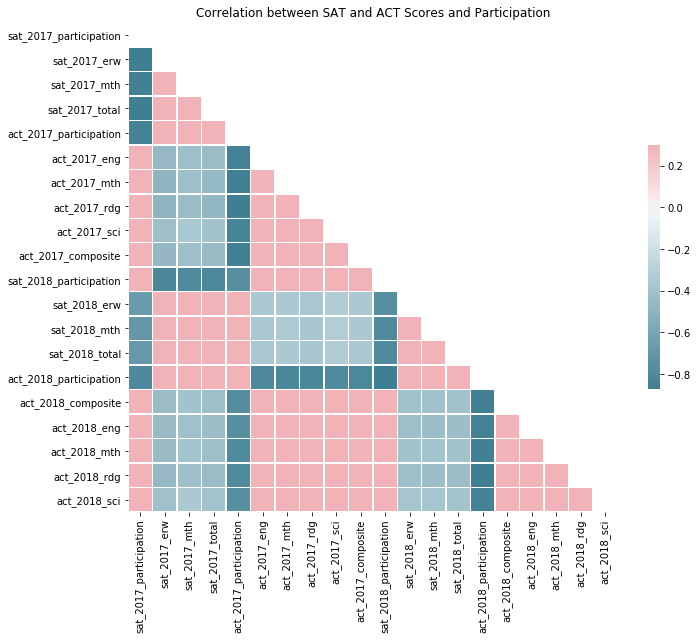

In [60]:
d = pd.DataFrame(data=final)

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title("Correlation between SAT and ACT Scores and Participation");

#### Heatmap observations
At a quick glance, we notice that as SAT participation increases, ACT participation will decrease. Higher participation also leads to lower mean score for each state.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [61]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, main_title, list_of_colour, xlabel):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12,10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], color=list_of_colour[i]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i], fontsize=12)
        ax[i].set_xlabel(xlabel, fontsize=12)
        ax[i].set_ylabel("Number of States", fontsize=12)
        plt.suptitle(main_title, fontsize=20)
        ax[i].axvline(np.mean(final[column]), color='maroon', linestyle='--', lw=1); #set the mean line# Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [62]:
final[['act_2017_sci', 'act_2018_sci']].describe()

,act_2017_sci,act_2018_sci
count,51.000000,51.000000
mean,21.450980,21.345098
std,1.739353,1.870114
min,18.200000,17.900000
25%,19.950000,19.850000
50%,21.300000,21.100000
75%,23.200000,23.050000
max,24.900000,24.900000


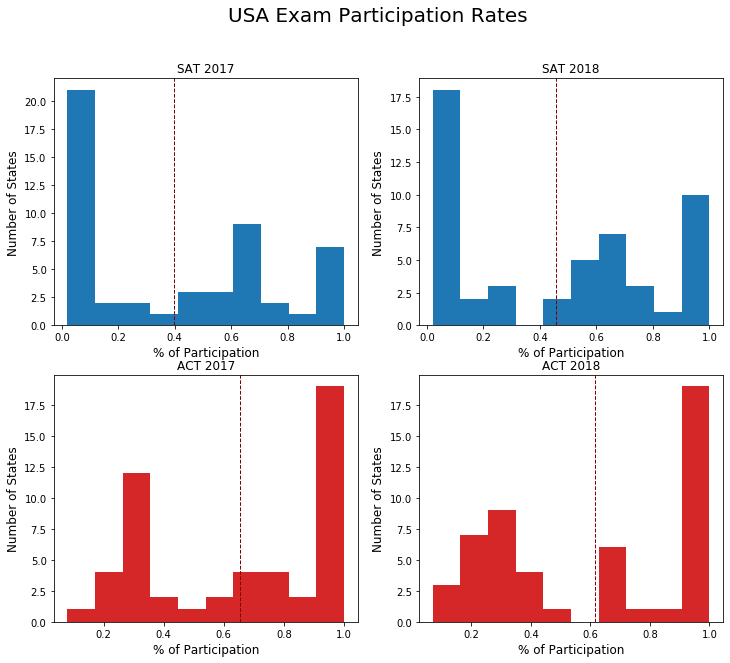

In [63]:
# Code
subplot_histograms(final,['sat_2017_participation', 'sat_2018_participation', 'act_2017_participation', 'act_2018_participation'], ['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018'], ['% of Participation', '% of Participation','% of Participation','% of Participation',], 'USA Exam Participation Rates', ['tab:blue', 'tab:blue', 'tab:red', 'tab:red'], '% of Participation')

#### Exam Participation Observations
Based on the four graphs, we can deduce that ACT is the more popular exam, some states also have preference on taking only one of the two exams in a year (with exceptions of certain states that have high participation in both exams).

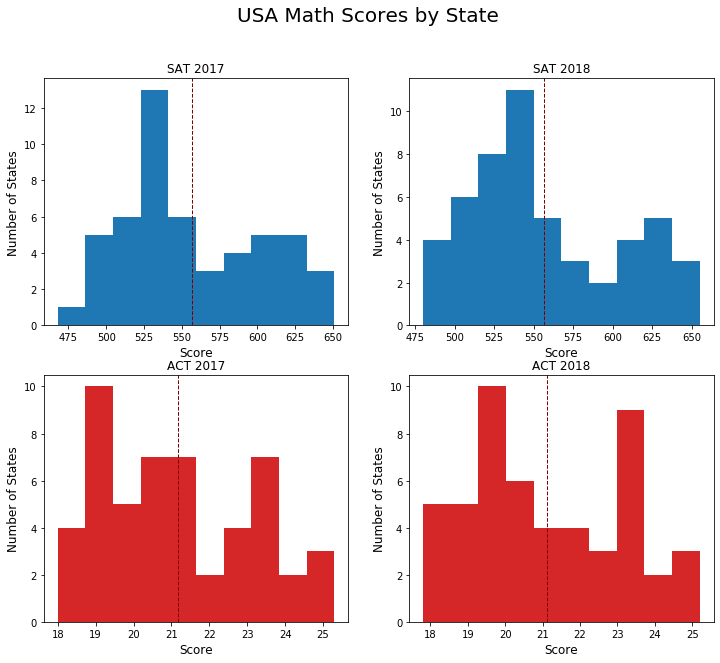

In [64]:
# Code
subplot_histograms(final,['sat_2017_mth', 'sat_2018_mth', 'act_2017_mth', 'act_2018_mth'], ['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018'], ['% of mth', '% of mth','% of mth','% of mth'], 'USA Math Scores by State', ['tab:blue', 'tab:blue', 'tab:red', 'tab:red'], 'Score')

#### Math Scores Observations
Based on the four graphs, we can deduce majority of states are performing below the average mean of math scores. ACT in 2018 however has a significant improvement of states with higher ACT scores well above the mean. It will be productive to understand the methods used by these states that helped improve the overall performance.

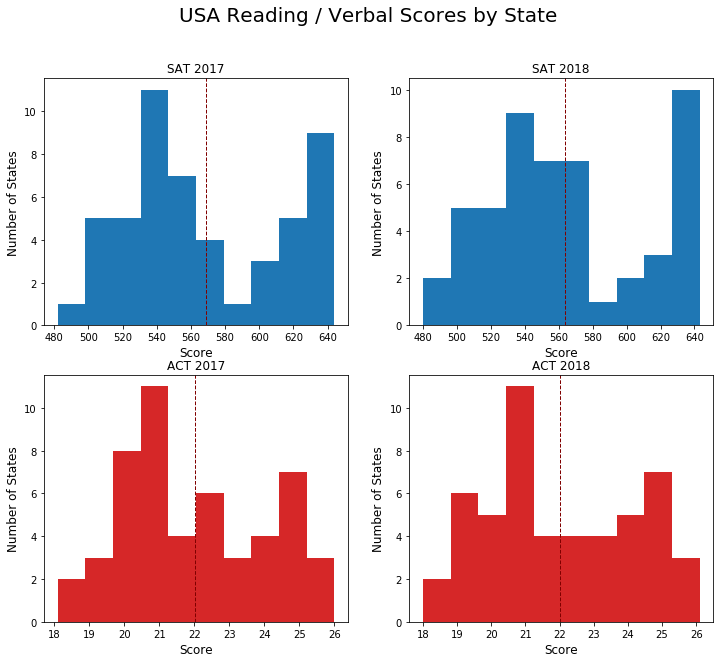

In [65]:
# Code
subplot_histograms(final,['sat_2017_erw', 'sat_2018_erw', 'act_2017_rdg', 'act_2018_rdg'], ['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018'], ['% of mth', '% of mth','% of mth','% of mth',], 'USA Reading / Verbal Scores by State', ['tab:blue', 'tab:blue', 'tab:red', 'tab:red'], 'Score')

#### Reading / Verbal Scores Observations
Based on the four graphs, reading scores maintain the same from 2017 to 2018. However it is well worth noting that there are around 10 states which performed close to the max value score for SAT among the 50 states, and majority of states are close to the mean value as well. ACT on the other hand has majority of states performing below the mean average of the nation.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [66]:
# Code
def subplot_scatter(dataframe, list_of_columns, list_of_xaxis, list_of_titles, list_of_xlabels, list_of_ylabels, main_title, list_of_colour):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,5)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].scatter(dataframe[column], color=list_of_colour[i], y=dataframe[list_of_xaxis[i]], s=20) # feel free to add more settings
        ax[i].set_title(list_of_titles[i], fontsize=12)
        ax[i].set_xlabel(list_of_xlabels[i], fontsize=12)
        ax[i].set_ylabel(list_of_ylabels[i], fontsize=12)
        plt.suptitle(main_title, fontsize=20)

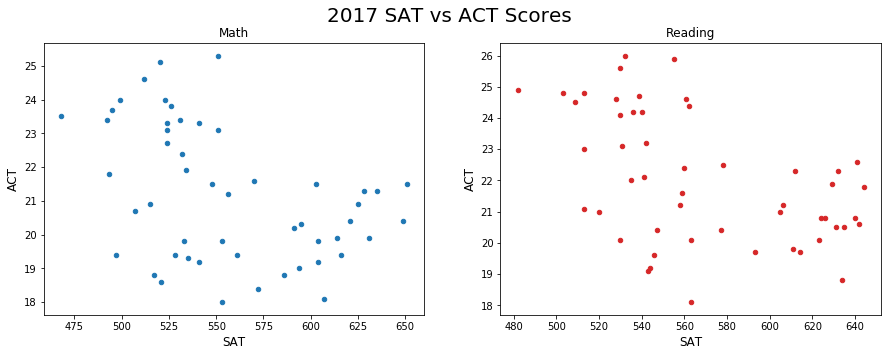

In [67]:
subplot_scatter(final, ['sat_2017_mth', 'sat_2017_erw'], ['act_2017_mth', 'act_2017_rdg'], ['Math', 'Reading'], ['SAT', 'SAT'], ['ACT', 'ACT'], '2017 SAT vs ACT Scores', ['tab:blue', 'tab:red'])

#### SAT vs ACT 2017 Observations
There is no correlation between the performance for Math and Reading for both exams (e.g. high math scores for SAT does not necessarily result in high math scores for ACT)

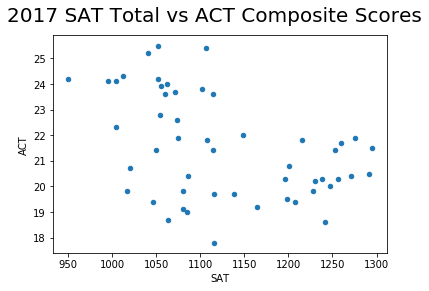

In [68]:
final.plot(kind='scatter', x='sat_2017_total', y='act_2017_composite')
plt.suptitle('2017 SAT Total vs ACT Composite Scores', fontsize=20)
plt.xlabel('SAT', fontsize=10)
plt.ylabel('ACT', fontsize=10);

#### SAT Total vs ACT Composite 2017 Observations
There is a slight inverse correlation between the SAT total score and ACT correlation score. With states performing well for SAT in 2017 having a slightly lower ACT composite score and vice versa.

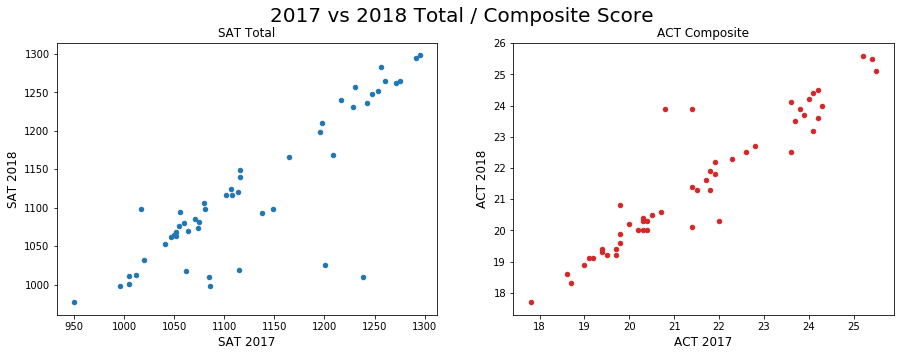

In [69]:
subplot_scatter(final, ['sat_2017_total', 'act_2017_composite'], ['sat_2018_total', 'act_2018_composite'], ['SAT Total', 'ACT Composite'], ['SAT 2017', 'ACT 2017'], ['SAT 2018', 'ACT 2018'], '2017 vs 2018 Total / Composite Score', ['tab:blue', 'tab:red'])

#### 2017 vs 2018 Observations
There is a clear correlation between the two years for both exams. States which performed well for SAT in 2017 performed well for 2018 as well, where the same applies to ACT. States which performed poorly for one exam also performed poorly for the same exam the following year.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [70]:
# Code
# We create new sets of dataframes to categorise the elements we want in each boxplot
# We categorise these new df based on their similar min and max values

# SAT 2017 & 2018 modules
# Rename columns to display presentable names in boxplot
bpsat = pd.DataFrame(data = final, columns = ['sat_2017_mth', 'sat_2017_erw', 'sat_2018_mth', 'sat_2018_erw'])
bpsat.rename(columns={
    'sat_2017_mth': '2017 Math', 'sat_2017_erw': '2017 Reading', 'sat_2018_mth': '2018 Math', 'sat_2018_erw': '2018 Reading'    
},inplace=True)

# SAT 2017 & 2018 total
bpsat_total = pd.DataFrame(data = final, columns = ['sat_2017_total', 'sat_2018_total'])
bpsat_total.rename(columns={
    'sat_2017_total': '2017', 'sat_2018_total': '2018'    
},inplace=True)

# ACT 2017 & 2018 modules
bpact = pd.DataFrame(data = final, columns = ['act_2017_eng', 'act_2017_mth', 'act_2017_rdg', 'act_2017_sci', 'act_2018_eng', 'act_2018_mth', 'act_2018_rdg', 'act_2018_sci'])
bpact.rename(columns={
    'act_2017_eng': '2017 English', 'act_2017_mth': '2017 Math', 'act_2017_rdg': '2017 Reading', 'act_2017_sci': '2017 Science', 'act_2018_eng': '2018 English', 'act_2018_mth': '2018 Math', 'act_2018_rdg': '2018 Reading', 'act_2018_sci': '2018 Science'    
},inplace=True)

# ACT 2017 & 2018 composite
bpact_composite = pd.DataFrame(data = final, columns = ['act_2017_composite', 'act_2018_composite'])
bpact_composite.rename(columns={
    'act_2017_composite': '2017', 'act_2018_composite': '2018'
},inplace=True)

# SAT & ACT participation for 2017 & 2018
bp_participation = pd.DataFrame(data = final, columns = ['sat_2017_participation', 'sat_2018_participation', 'act_2017_participation', 'act_2018_participation'])
bp_participation.rename(columns={
    'sat_2017_participation': '2017 SAT', 'sat_2018_participation': '2018 SAT', 'act_2017_participation': '2017 ACT', 'act_2018_participation': '2018 ACT'
},inplace=True)

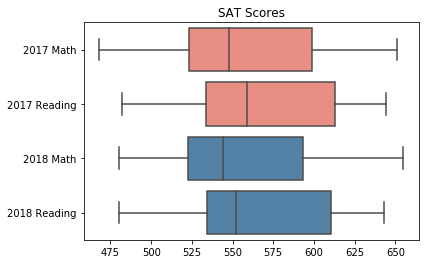

In [71]:
# Setting a criteria to group colours into categories based on differences in values (e.g. 2017 and 2018 are different categories)
bpsatcat = {columns: "SteelBlue" if '2018' in columns else "Salmon" for columns in bpsat.columns.unique()}

# Create a boxplot with title set
sns.boxplot(data=(bpsat), palette=bpsatcat, orient='h').set_title('SAT Scores');



#### SAT Module Observations
We need to pay attention to states below the 25% percentile as the mean score is close to 100 above the minimum amount. There is at least 50% of the states which have scores below the mean and we need to identify the differences in education standards.

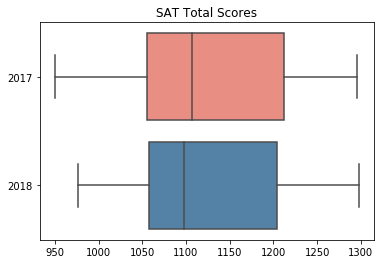

In [72]:
bpsatcat_total = {columns: "SteelBlue" if '2018' in columns else "Salmon" for columns in bpsat_total.columns.unique()}

sns.boxplot(data=(bpsat_total), palette=bpsatcat_total, orient='h').set_title('SAT Total Scores');

#### SAT Total Observations
As observed for each individual module, 50% of the states are performing below the mean (e.g. mean ~1100 vs median score ~1090). However, 2018 performance slightly improved as the minimum value has increased from 950 to 970.

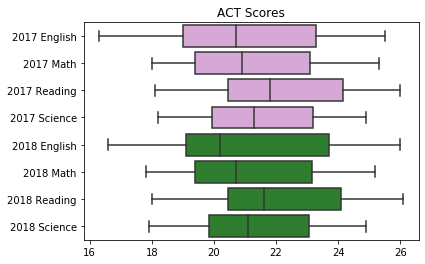

In [73]:
bpactcat = {columns: "forestgreen" if '2018' in columns else "plum" for columns in bpact.columns.unique()}

sns.boxplot(data=(bpact), orient = 'h', palette=bpactcat).set_title('ACT Scores');


#### ACT Module Observations
As observed for each individual module, english appears to be a subject which certain states are struggling in with the bottom 25% being very far off from the median. In 2018, the mean for all modules have decreased which indicates poorer performance from more states compared to 2017, with the greatest drop coming from the english subject.

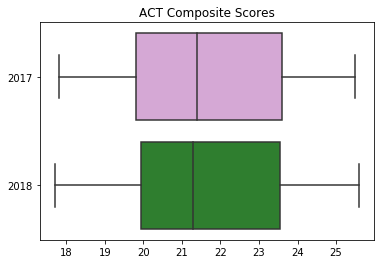

In [74]:
bpactcat_composite = {columns: "forestgreen" if '2018' in columns else "plum" for columns in bpact_composite.columns.unique()}

sns.boxplot(data=(bpact_composite), palette=bpactcat_composite, orient='h').set_title('ACT Composite Scores');

#### ACT Composite Observations
Performance remains consistent for 2017 and 2018, attention needs to be paid towards states which are consistently performing poorly for both years.

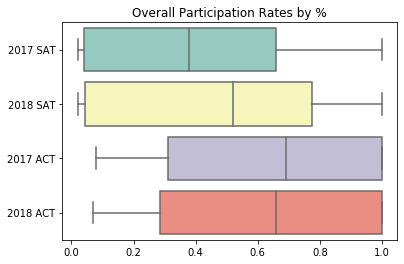

In [75]:
sns.boxplot(data=(bp_participation), palette='Set3', orient='h').set_title('Overall Participation Rates by %');

#### Participation Rate Observations
ACT appears to be the popular choice for most states as the mean participation is well above 50%. Outlier states for ACT are likely the participants for SAT in both years.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### Investigating countries with significant participation rate changes

In [76]:
# We create a new column to determine which states have significant movement in participation from 2017 to 2018 by filtering movements by more than 15%
sat_attention = final.loc[((final['sat_2017_participation'] - final['sat_2018_participation']) > 0.15) | ((final['sat_2017_participation'] - final['sat_2018_participation']) < -0.15),['state','sat_2017_participation','sat_2018_participation']]
sat_attention['movement'] = sat_attention['sat_2017_participation'] - sat_attention['sat_2018_participation']
sat_attention

,state,sat_2017_participation,sat_2018_participation,movement
5,Colorado,0.11,1.00,-0.89
9,Florida,0.83,0.56,0.27
13,Illinois,0.09,0.99,-0.90
39,Rhode Island,0.71,0.97,-0.26


#### Plot a line chart to display States with significant participation movement
##### By doing so, we can clearly present which states' method of encouraging participation rates is effective

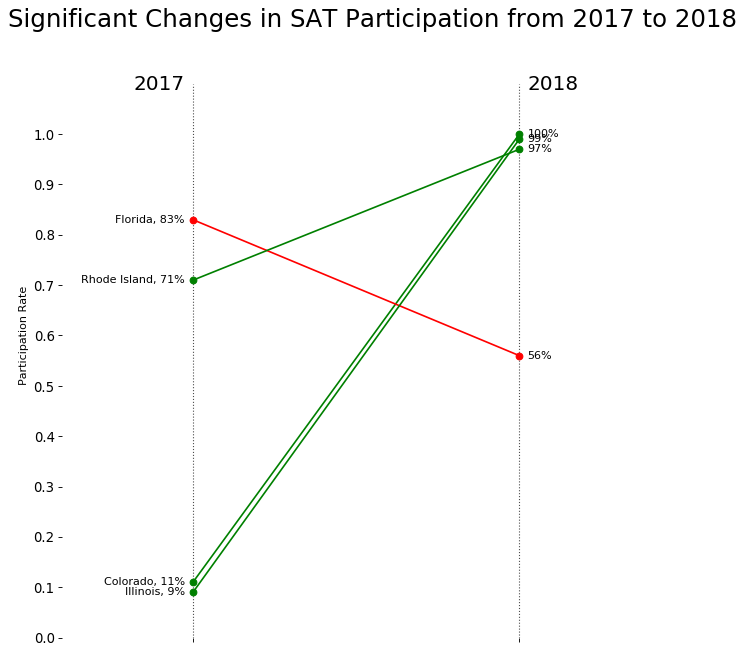

In [77]:
import matplotlib.lines as mlines

# Creating markers to indicate states and percentages for 2017 and 2018
left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(sat_attention.state, sat_attention['sat_2017_participation'])]
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(sat_attention.state, sat_attention['sat_2018_participation'])]
klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(sat_attention['sat_2017_participation'], sat_attention['sat_2018_participation'])]

# Creating line style to indicate increase or decrease in participation rate based on color
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(10,10), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=0, ymax=1.1, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=1.1, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Line Segmentsand Annotation
for p1, p2, c in zip(sat_attention['sat_2017_participation'], sat_attention['sat_2018_participation'], sat_attention['state']):
    newline([1,p1], [3,p2])
    ax.text(1-0.05, p1, c + ', ' + str(int(p1*100)) + '%', horizontalalignment='right', verticalalignment='center', fontdict={'size':10})
    ax.text(3+0.05, p2, str(int(p2*100)) + '%', horizontalalignment='left', verticalalignment='center', fontdict={'size':10})

# 'Before' and 'After' Annotations
ax.text(1-0.05, 1.1, '2017', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':500})
ax.text(3+0.05, 1.1, '2018', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':500})

# Decoration
ax.set_title("Significant Changes in SAT Participation from 2017 to 2018", fontdict={'size':22})
ax.set(xlim=(0.2,4), ylim=(0,1.2), ylabel='Participation Rate')
ax.set_xticks([1,3])
ax.set_xticklabels(["", ""])
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

#### SAT Participation Rate Observations
From the line chart, we can see that Colorado and Illinois have greatly increased their participation for SAT. Looking back at the boxplot charts, the mean score from 2017 to 2018 has increased which are likely contributed from these two states.

In [78]:
act_attention = final.loc[((final['act_2017_participation'] - final['act_2018_participation']) > 0.15) | ((final['act_2017_participation'] - final['act_2018_participation']) < -0.15),['state','act_2017_participation','act_2018_participation']]
act_attention['movement'] = act_attention['act_2017_participation'] - act_attention['act_2018_participation']
act_attention

,state,act_2017_participation,act_2018_participation,movement
1,Alaska,0.65,0.33,0.32
5,Colorado,1.00,0.30,0.70
13,Illinois,0.93,0.43,0.50
27,Nebraska,0.84,1.00,-0.16
35,Ohio,0.75,1.00,-0.25


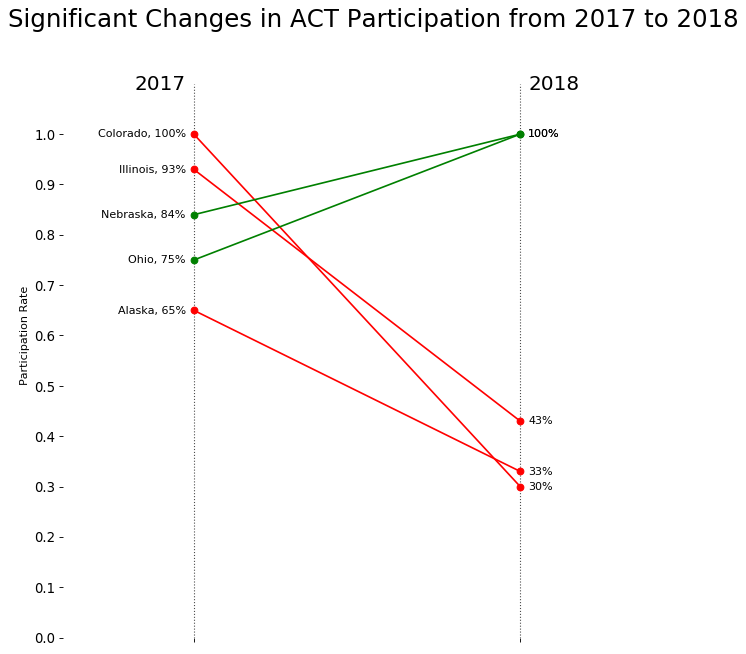

In [79]:
import matplotlib.lines as mlines

# Creating Markers to indicate states and percentages for 2017 and 2018
left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(act_attention.state, act_attention['act_2017_participation'])]
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(act_attention.state, act_attention['act_2018_participation'])]
klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(act_attention['act_2017_participation'], act_attention['act_2018_participation'])]

# Creating line style to indicate increase or decrease in participation rate based on color
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(10,10), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=0, ymax=1.1, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=1.1, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Line Segmentsand Annotation
for p1, p2, c in zip(act_attention['act_2017_participation'], act_attention['act_2018_participation'], act_attention['state']):
    newline([1,p1], [3,p2])
    ax.text(1-0.05, p1, c + ', ' + str(int(p1*100)) + '%', horizontalalignment='right', verticalalignment='center', fontdict={'size':10})
    ax.text(3+0.05, p2, str(int(p2*100)) + '%', horizontalalignment='left', verticalalignment='center', fontdict={'size':10})

# 'Before' and 'After' Annotations
ax.text(1-0.05, 1.1, '2017', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':500})
ax.text(3+0.05, 1.1, '2018', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':500})

# Decoration
ax.set_title("Significant Changes in ACT Participation from 2017 to 2018", fontdict={'size':22})
ax.set(xlim=(0.2,4), ylim=(0,1.2), ylabel='Participation Rate')
ax.set_xticks([1,3])
ax.set_xticklabels(["", ""])
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

#### ACT Participation Rate Observations
As expected from the inverse relation, Colorado and Illinois' participation for ACT has decreased as rates increased for SAT. There appears to be more states moving out of ACT. However, Nebraska and Ohio have shifted to a 100% participation rate for ACT in 2018 from 84% and 75% respectively.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

In [80]:
final.describe()

,sat_2017_participation,sat_2017_erw,sat_2017_mth,sat_2017_total,act_2017_participation,act_2017_eng,act_2017_mth,act_2017_rdg,act_2017_sci,act_2017_composite,sat_2018_participation,sat_2018_erw,sat_2018_mth,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_eng,act_2018_mth,act_2018_rdg,act_2018_sci
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.098039,0.652549,20.931373,21.182353,22.013725,21.450980,21.519608,0.457451,563.686275,556.235294,1120.019608,0.616471,21.486275,20.988235,21.125490,22.015686,21.345098
std,0.352766,45.666901,47.121395,92.494812,0.321408,2.353677,1.981989,2.067271,1.739353,2.020695,0.373143,47.502627,47.772623,94.155083,0.340810,2.106278,2.446356,2.035765,2.167245,1.870114
min,0.020000,482.000000,468.000000,950.000000,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,0.020000,480.000000,480.000000,977.000000,0.070000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,0.040000,533.500000,523.500000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,0.045000,534.500000,522.500000,1057.500000,0.285000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.520000,552.000000,544.000000,1098.000000,0.660000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,0.775000,610.500000,593.500000,1204.000000,1.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,643.000000,655.000000,1298.000000,1.000000,25.600000,26.000000,25.200000,26.100000,24.900000


#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

### Participation rates 2017 & 2018
#### Both SAT and ACT are exponentially distributed and appear to be inversely correlated.

This is because:
- SAT has more than 25 states with participation below 40% for both years
- ACT has more than 20 states with participation above 60%
- States that have higher participation rates for ACT tend to have lower rates for SAT such as Colorado (11% for SAT and 100% for ACT in 2017)

### Math 2017 & 2018
#### SAT Math has a normal distribution with a slight positive skew

This is because:
- Mean is at 556 for both years, with the median being at around 545
- From the median, we can identify that the graph is close to normal distribution due to it's low standard deviation of 47

#### ACT Math does not have a normal distribution

This is because:
- Mean is at 21 with the median being slightly lower at around 20
- Standard Deviation is quite high at 2, which indicates that varying states will perform either well or poorly for Math, far from the mean amount
- Over 15 states achieved a score of above 23 and over 20 states achieved a score of below 20 which are out of the mean amount of 21

### Reading 2017 & 2018
#### SAT Reading does not have a normal distribution

This is because:
- Despite having a mean of around 560 for both years, the differences between each quartile is very close in value (e.g. SAT 2017 bottom 25% difference of 50 and second quartile difference of 30)
- This results in the distribution being more spread out rather than a consistent bell shape. Additionally, a high number of states scored close to the max value of 644, resulting in the top quartile difference being around 30

#### ACT Reading and English does not have a normal distribution

This is because:
- Similar to ACT Math, quartile differences are similar with a value of 2 which indicates a more even distribution
- Standard deviation is also around the range of 2 to 2.5 for both years

### Science 2017 & 2018
#### ACT Science has a normal distribution

This is because:
- Lower standard deviation of 1.7
- Second and third quartile are relatively close to the mean of 21.5 (second quartile ~20 and third quartile ~23) which indicates more states being closer to the national average with fewer outliers


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

Answer: Central Limit Theorem applies when there are at least 30 samples tested. As there are 51 samples each year, we have observed that there is a normal distribution (with slight skew).

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: The assumption holds for both Math and Reading modules as it is observing consistent sample means of students who have already sat for the same exam, with the same questions and thus the mean for each state can be deduced as fair and consistent. When we prepare estimations for the following year, we are likely able to gauge where the mean would fall.


However this is not the case for participation rates as selection of a sample from each state will usually lead to a definite True or False outcome, such as states with 100% participation and other states with less than 20% participation. As we continue to re-run our sample testing to create estimates, despite being a normal distribution with a large skew, we may not be able to anticipate great increase / decrease in participation from states such as Colorado and Illinois.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: It is difficult to perform a statistical inference from just SAT and ACT participation rates in 2017 only.

Certain state colleges require specific module or knowledge from one of the two exams for entry which results in the preferences for each state.

States that have less participation rate for ACT 2017 such as Maine (8%) only have a population of ~1.3M, while South Carolina with 100% participation has a population of ~5.1M, even though mean participation rate will be brought down by Maine, it does not indicate that the total population of the USA has a low overall participation rate.

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

Answer: We are not able to directly compare as SAT and ACT have different standards, marking scheme, questions and measurement of score (e.g. SAT and ACT math scores do not both range from 0 to 100). It is only appropriate to compare SAT scores of the same module by each year.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [81]:
# Code:
# Gathering total scores for SAT, split between 2017 and 2018
sat2017hyp = final['sat_2017_total']
sat2018hyp = final['sat_2018_total']
sat2017hyp.head()

0    1165
1    1080
2    1116
3    1208
4    1055
Name: sat_2017_total, dtype: int64

In [82]:
# Testing measured difference
sat2018hyp.mean()-sat2017hyp.mean()

-6.078431372548948

For our experiment, we will set up a null hypothesis and an alternative hypothesis:

$H_0:$ The true mean difference in SAT Total Scores between 2017 and 2018 is 0.

$H_A:$ The true mean difference in SAT Total Scores between 2017 and 2018 is NOT 0.

$$
\begin{align}
H_0: & \mu_\text{2018} = \mu_\text{2017} \\
H_A: & \mu_\text{2018} \ne \mu_\text{2017} \\
\end{align}
$$

Our measured difference is $\bar{x}_\text{2018} - \bar{x}_\text{2017} = -6.09$

In [83]:
# Conduct our t-test
stats.ttest_ind(sat2018hyp,sat2017hyp)

Ttest_indResult(statistic=-0.32888697491988567, pvalue=0.7429288943265793)

In [84]:
# Level of significance
𝛼 = 0.05
pvalue = 0.74

As $p\text{-value} \ge \alpha$, there is insufficient evidence to reject the null hypothesis and we cannot accept that either $H_0$ or $H_A$ is correct.
    - i.e., there is no statistical difference between the two groups.

Thus we cannot determine if there is any significant improvement in the states' SAT scores from 2017 to 2018.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Based on our research and observations, the three states that we are particularly interested in are **Colorado, Illinois and Nebraska**.

- **Colorado**

Colorado SAT participation rates increased from 11% to 100%. This is due to the state making it mandatory for students to sit for SAT after a drastic change in the education system to align the standards of SAT with the states' education values. As a result ACT participation rate had decreased from 100% to 30%.

- **Illinois**

We saw a massive increate in participation for SAT in Illinois from 9% to 99% in just one year. This is due to Illinois awarding SAT a multi-million dollar contract as a part of their plan to improve school standards and help underperforming schools. With this, the participation rates for ACT in 2018 dropped drastically to 43% from 93%.

This results in schools paying for students' exam entrance fees of $50 which not all families are able to afford.

- **Nebraska**

The state of Nebraska saw an increase in participation rate from 84% to 100%. This is due to Nebraska offering the ACT for free to all juniors from 2017 onwards. As student loans are generally very expensive, this is an understandable increase to encourage students to take the ACTs. Additionally, Nebraska has appeared to score better than other states who have 100% participation which may indicate a relation for free admissions on participation rates as well as composite performance.


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

In [85]:
# Identify States that have low participation for exams
final[['state','sat_2018_participation','act_2018_participation']].loc[(final['sat_2018_participation'] < 0.7) & (final['act_2018_participation'] < 0.7)].sort_values(['act_2018_participation']).head()

,state,sat_2018_participation,act_2018_participation
45,Vermont,0.64,0.24
46,Virginia,0.68,0.24
47,Washington,0.69,0.24
4,California,0.60,0.27
14,Indiana,0.63,0.32


Based on our research on states that reflect a drastic improvement in participation rates such as Illinois and Nebraska. We deduced that offering free admissions would greatly encourage higher participation as well as potentially improving total / composite scores. Potentially there are many individuals who did not sit for the exam, not by choice, but because they may be unable to afford it.

We recommend states such as Washington, California, Vermont, Virginia and Indiana with poor participation rates for both SAT and ACT in 2018, to consider making exam admissions more accessible and affordable for students. States like California also have a large population and the low percentage of participation of 60% and 27% for SAT and ACT respectively amounts to a large population of the United States.

To help improve our findings, data such as per capita GDP for each state will help us target which states are greatly in need of financial assistance to improve the education system as well as giving all students in every state equal opportunity.